# Preparando Ambiente

In [2]:
#instalando o módulo wget

!pip install -q wget
import wget

  Preparing metadata (setup.py) ... done


In [3]:
#instalando Java Runtime Environment (JRE) versão 8

!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'openjdk-11-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk*'
Note, selecting 'openjdk-11-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-18-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-17-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-doc' for glob 'openjdk*'
Note, selecting 'openjdk-18-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-18-doc' for glob 'openjdk*'
Note, selecting 'openjdk-17-jre' for glob 'openjdk*'
Note, selecting 'openjdk-17-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-dbg' for glob 'openjdk

In [4]:
#baixando Apache Spark versão 3.0.0

!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz && rm spark-3.5.0-bin-hadoop3.tgz

In [5]:
#configurando variáveis de ambiente

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [6]:
#instalando pacotes

!pip install -q findspark
import findspark
findspark.init()

In [7]:
#criando a sessão em Spark

from pyspark.sql import SparkSession

spark = SparkSession.builder\
     .master('local[*]')\
    .appName("Spark220")\
    .config('spark.ui.port', '4050')\
    .getOrCreate()

spark

In [8]:
#baixando ngrok

!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [9]:
#definindo o token do ngrok e a porta

get_ipython().system_raw('./ngrok authtoken 2XG5cBSVcPXVVDm53lBUopDoh27_4KoNuhc8ksKP4H7Pwa4ro')
get_ipython().system_raw('./ngrok http 4050 &')

In [10]:
!curl -s http://localhost:4040/api/tunnels


{"tunnels":[],"uri":"/api/tunnels"}


In [11]:
spark

In [12]:
#ler acessar driver driver

from google.colab import drive
drive.mount('content/')

Mounted at content/


#Lendo arquivos

In [13]:
path = '/content/content/MyDrive/Dados/empresas'
empresas = spark.read.csv(path, sep=';', inferSchema=True)

In [14]:
empresas.count()

4585679

In [15]:
path = '/content/content/MyDrive/Dados/estabelecimentos'
estabelecimentos = spark.read.csv(path, sep=';', inferSchema=True)

In [16]:
estabelecimentos.count()

4836219

In [17]:
path = '/content/content/MyDrive/Dados/socios'
socios = spark.read.csv(path, sep=';', inferSchema=True)

In [18]:
socios.count()

2046430

#Visualizando a tabela de empresas

In [19]:
empresasColNames = ['cnpj_basico', 'razao_social_nome_empresarial', 'natureza_juridica', 'qualificacao_do_responsavel', 'capital_social_da_empresa', 'porte_da_empresa', 'ente_federativo_responsavel']

In [20]:
for index, col in enumerate(empresasColNames):
  empresas = empresas.withColumnRenamed(f"_c{index}", col)

In [21]:
empresas.limit(5).toPandas()

,cnpj_basico,razao_social_nome_empresarial,natureza_juridica,qualificacao_do_responsavel,capital_social_da_empresa,porte_da_empresa,ente_federativo_responsavel
0,306,FRANCAMAR REFRIGERACAO TECNICA S/C LTDA,2240,49,"0,00",1,None
1,1355,BRASILEIRO & OLIVEIRA LTDA,2062,49,"0,00",5,None
2,4820,"REGISTRO DE IMOVEIS, TABELIONATO 1 DE NOTAS E ...",3034,32,"0,00",5,None
3,5347,ROSELY APARECIDA MONTEIRO CALTABIANO FREITAS,2135,50,"0,00",5,None
4,6846,BADU E FILHOS TECIDOS LTDA,2062,49,"4000,00",1,None


In [22]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: string (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [23]:
from pyspark.sql.types import DoubleType, StringType
from pyspark.sql import functions

In [24]:
#ajustar representacao do capital
#mudar de ',' para '.'
#converter de int para double
empresas = empresas.withColumn('capital_social_da_empresa', functions.regexp_replace('capital_social_da_empresa',',','.'))
empresas = empresas.withColumn('capital_social_da_empresa', empresas['capital_social_da_empresa'].cast(DoubleType()))

In [25]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [26]:
empresas.limit(5).toPandas()

,cnpj_basico,razao_social_nome_empresarial,natureza_juridica,qualificacao_do_responsavel,capital_social_da_empresa,porte_da_empresa,ente_federativo_responsavel
0,306,FRANCAMAR REFRIGERACAO TECNICA S/C LTDA,2240,49,0.0,1,None
1,1355,BRASILEIRO & OLIVEIRA LTDA,2062,49,0.0,5,None
2,4820,"REGISTRO DE IMOVEIS, TABELIONATO 1 DE NOTAS E ...",3034,32,0.0,5,None
3,5347,ROSELY APARECIDA MONTEIRO CALTABIANO FREITAS,2135,50,0.0,5,None
4,6846,BADU E FILHOS TECIDOS LTDA,2062,49,4000.0,1,None


#Visualizando a tabela de estabelecimentos

In [27]:
estabsColNames = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'nome_da_cidade_no_exterior', 'pais', 'data_de_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'tipo_de_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'ddd_2', 'telefone_2', 'ddd_do_fax', 'fax', 'correio_eletronico', 'situacao_especial', 'data_da_situacao_especial']

In [28]:
for index, col in enumerate(estabsColNames):
  estabelecimentos = estabelecimentos.withColumnRenamed(f"_c{index}", col)

In [29]:
estabelecimentos.limit(5).toPandas()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_da_cidade_no_exterior,pais,...,municipio,ddd_1,telefone_1,ddd_2,telefone_2,ddd_do_fax,fax,correio_eletronico,situacao_especial,data_da_situacao_especial
0,1879,1,96,1,PIRAMIDE M. C.,8,20011029,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
1,2818,1,43,1,None,8,20081231,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
2,3110,1,7,1,None,8,19971231,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
3,3733,1,80,1,None,8,20081231,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
4,4628,3,27,2,EMBROIDERY & GIFT,8,19980429,1,None,NaN,...,7075,None,None,None,None,NaN,None,None,None,NaN


In [30]:
estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: integer (nullable = true)
 |-- data_situacao_cadastral: integer (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_da_cidade_no_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_de_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: integer (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_de_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: integer (nullable = true)
 |-- ddd_1: str

In [31]:
# Arrumar representação dos Dados dos Socios
# converter coluna de int para string e utilizar a funcao to_date
estabelecimentos = estabelecimentos.withColumn('data_situacao_cadastral', functions.to_date(estabelecimentos['data_situacao_cadastral'].cast(StringType()), 'yyyyMMdd'))
estabelecimentos = estabelecimentos.withColumn('data_de_inicio_atividade', functions.to_date(estabelecimentos['data_de_inicio_atividade'].cast(StringType()), 'yyyyMMdd'))
estabelecimentos = estabelecimentos.withColumn('data_da_situacao_especial', functions.to_date(estabelecimentos['data_da_situacao_especial'].cast(StringType()), 'yyyyMMdd'))

In [32]:
estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: integer (nullable = true)
 |-- data_situacao_cadastral: date (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_da_cidade_no_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_de_inicio_atividade: date (nullable = true)
 |-- cnae_fiscal_principal: integer (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_de_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: integer (nullable = true)
 |-- ddd_1: string (n

In [33]:
estabelecimentos.show(truncate=False)

+-----------+----------+-------+---------------------------+-----------------------------------+------------------+-----------------------+-------------------------+--------------------------+----+------------------------+---------------------+---------------------------------------+------------------+----------------------+------+-------------------+------------------+--------+---+---------+-----+----------+-----+----------+----------+--------+----------------------------+-----------------+-------------------------+
|cnpj_basico|cnpj_ordem|cnpj_dv|identificador_matriz_filial|nome_fantasia                      |situacao_cadastral|data_situacao_cadastral|motivo_situacao_cadastral|nome_da_cidade_no_exterior|pais|data_de_inicio_atividade|cnae_fiscal_principal|cnae_fiscal_secundaria                 |tipo_de_logradouro|logradouro            |numero|complemento        |bairro            |cep     |uf |municipio|ddd_1|telefone_1|ddd_2|telefone_2|ddd_do_fax|fax     |correio_eletronico          

#Visualizando a tabela de socios

In [34]:
sociosColNames = ['cnpj_basico', 'identificador_de_socio', 'nome_do_socio_ou_razao_social', 'cnpj_ou_cpf_do_socio', 'qualificacao_do_socio', 'data_de_entrada_sociedade', 'pais', 'representante_legal', 'nome_do_representante', 'qualificacao_do_representante_legal', 'faixa_etaria']

In [35]:
for index, col in enumerate(sociosColNames):
  socios = socios.withColumnRenamed(f"_c{index}", col)

In [36]:
socios.limit(5).toPandas()

,cnpj_basico,identificador_de_socio,nome_do_socio_ou_razao_social,cnpj_ou_cpf_do_socio,qualificacao_do_socio,data_de_entrada_sociedade,pais,representante_legal,nome_do_representante,qualificacao_do_representante_legal,faixa_etaria
0,411,2,LILIANA PATRICIA GUASTAVINO,***678188**,22,19940725,NaN,***000000**,None,0,7
1,411,2,CRISTINA HUNDERTMARK,***637848**,28,19940725,NaN,***000000**,None,0,7
2,5813,2,CELSO EDUARDO DE CASTRO STEPHAN,***786068**,49,19940516,NaN,***000000**,None,0,8
3,5813,2,EDUARDO BERRINGER STEPHAN,***442348**,49,19940516,NaN,***000000**,None,0,5
4,14798,2,HANNE MAHFOUD FADEL,***760388**,49,19940609,NaN,***000000**,None,0,8


In [37]:
socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_de_socio: integer (nullable = true)
 |-- nome_do_socio_ou_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_do_socio: string (nullable = true)
 |-- qualificacao_do_socio: integer (nullable = true)
 |-- data_de_entrada_sociedade: integer (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_do_representante: string (nullable = true)
 |-- qualificacao_do_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



In [38]:
# Arrumar representação dos Dados dos Socios
# converter coluna de int para string e utilizar a funcao to_date
socios = socios.withColumn('data_de_entrada_sociedade', functions.to_date(socios['data_de_entrada_sociedade'].cast(StringType()), 'yyyyMMdd'))

In [39]:
socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_de_socio: integer (nullable = true)
 |-- nome_do_socio_ou_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_do_socio: string (nullable = true)
 |-- qualificacao_do_socio: integer (nullable = true)
 |-- data_de_entrada_sociedade: date (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_do_representante: string (nullable = true)
 |-- qualificacao_do_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



#Consultas no SparkSQL

In [40]:
#Criar temporary view
empresas.createOrReplaceTempView('empresasView')
socios.createOrReplaceTempView('sociosView')
estabelecimentos.createOrReplaceTempView('estabelecimentosView')

#### Capital médio para cada porte de empresa

In [41]:
query = """
SELECT avg(emp.capital_social_da_empresa) as `capital_medio`, emp.porte_da_empresa as `porte`
FROM empresasView emp
WHERE emp.porte_da_empresa IS NOT NULL AND emp.capital_social_da_empresa IS NOT NULL
GROUP BY emp.porte_da_empresa
ORDER BY capital_medio desc;
"""

spark.sql(query).show()

+------------------+-----+
|     capital_medio|porte|
+------------------+-----+
|2601001.7677092673|    3|
| 708660.4208249798|    5|
|339994.53313506936|    1|
+------------------+-----+



<Axes: xlabel='porte'>

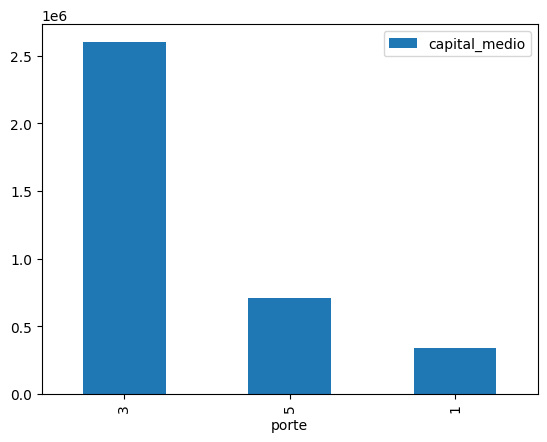

In [42]:
ax = spark.sql(query).toPandas()
ax.set_index(['porte']).plot(kind='bar')

#### Quantidade de estabelecimentos por UF

In [50]:
query = """
SELECT COUNT(cnpj_basico) as `quant`, uf
FROM estabelecimentosView
GROUP BY uf
ORDER BY quant desc;
"""

spark.sql(query).show()

+-------+---+
|  quant| uf|
+-------+---+
|1385303| SP|
| 530016| MG|
| 416661| RJ|
| 352513| RS|
| 323483| PR|
| 246648| BA|
| 216457| SC|
| 166082| GO|
| 148247| PE|
| 137705| CE|
| 100012| ES|
|  98057| PA|
|  88219| MT|
|  80661| DF|
|  75532| MA|
|  64792| MS|
|  61436| PB|
|  56497| RN|
|  50588| AM|
|  46542| AL|
+-------+---+
only showing top 20 rows



<Axes: xlabel='uf'>

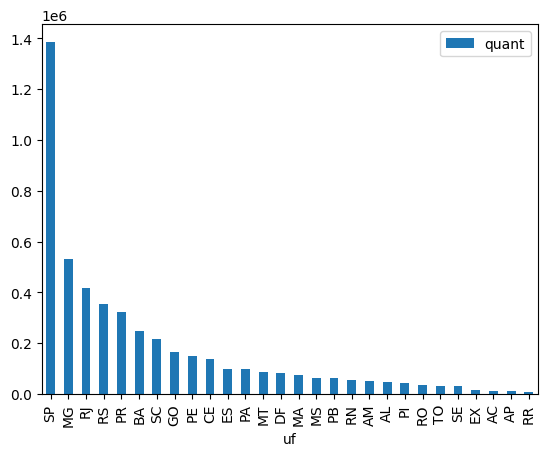

In [51]:
ax = spark.sql(query).toPandas()
ax.set_index(['uf']).plot(kind='bar')

#### Quantidade de entradas de socios na sociedade por ano

In [56]:
query = """
SELECT COUNT(nome_do_socio_ou_razao_social) as `quant`, YEAR(data_de_entrada_sociedade) as `ano`
FROM sociosView
WHERE YEAR(data_de_entrada_sociedade)  BETWEEN '2000' AND '2020'
GROUP BY YEAR(data_de_entrada_sociedade)
ORDER BY ano desc;
"""

spark.sql(query).show()

+------+----+
| quant| ano|
+------+----+
|125927|2020|
|118248|2019|
| 99935|2018|
| 90221|2017|
| 81587|2016|
| 80906|2015|
| 80590|2014|
| 83919|2013|
| 80101|2012|
| 83906|2011|
| 79337|2010|
| 75939|2009|
| 73285|2008|
| 68109|2007|
| 68611|2006|
|111314|2005|
| 53262|2004|
| 49289|2003|
| 53756|2002|
| 55284|2001|
+------+----+
only showing top 20 rows



<Axes: xlabel='ano'>

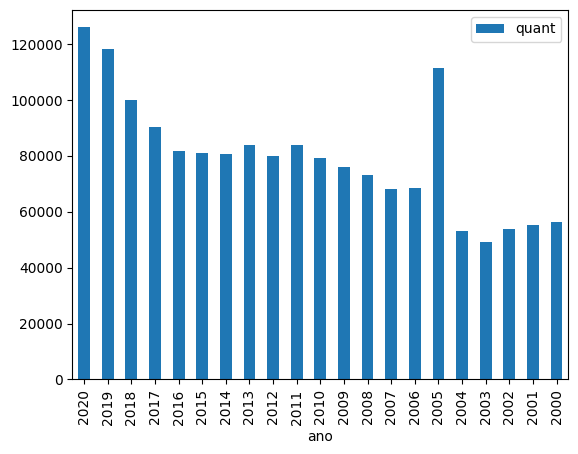

In [57]:
ax = spark.sql(query).toPandas()
ax.set_index(['ano']).plot(kind='bar')

In [44]:
empresas.show()

+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|cnpj_basico|razao_social_nome_empresarial|natureza_juridica|qualificacao_do_responsavel|capital_social_da_empresa|porte_da_empresa|ente_federativo_responsavel|
+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|        306|         FRANCAMAR REFRIGE...|             2240|                         49|                      0.0|               1|                       NULL|
|       1355|         BRASILEIRO & OLIV...|             2062|                         49|                      0.0|               5|                       NULL|
|       4820|         REGISTRO DE IMOVE...|             3034|                         32|                      0.0|               5|                       NULL|
|       5347|         ROSELY APARE

In [45]:
estabelecimentos.show()

+-----------+----------+-------+---------------------------+--------------------+------------------+-----------------------+-------------------------+--------------------------+----+------------------------+---------------------+----------------------+------------------+--------------------+------+-------------------+------------------+--------+---+---------+-----+----------+-----+----------+----------+--------+--------------------+-----------------+-------------------------+
|cnpj_basico|cnpj_ordem|cnpj_dv|identificador_matriz_filial|       nome_fantasia|situacao_cadastral|data_situacao_cadastral|motivo_situacao_cadastral|nome_da_cidade_no_exterior|pais|data_de_inicio_atividade|cnae_fiscal_principal|cnae_fiscal_secundaria|tipo_de_logradouro|          logradouro|numero|        complemento|            bairro|     cep| uf|municipio|ddd_1|telefone_1|ddd_2|telefone_2|ddd_do_fax|     fax|  correio_eletronico|situacao_especial|data_da_situacao_especial|
+-----------+----------+-------+------

In [46]:
socios.show()

+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+----+-------------------+---------------------+-----------------------------------+------------+
|cnpj_basico|identificador_de_socio|nome_do_socio_ou_razao_social|cnpj_ou_cpf_do_socio|qualificacao_do_socio|data_de_entrada_sociedade|pais|representante_legal|nome_do_representante|qualificacao_do_representante_legal|faixa_etaria|
+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+----+-------------------+---------------------+-----------------------------------+------------+
|        411|                     2|         LILIANA PATRICIA ...|         ***678188**|                   22|               1994-07-25|NULL|        ***000000**|                 NULL|                                  0|           7|
|        411|                     2|         CRISTINA HUNDERTMARK|      